# Original article
https://www.datacamp.com/community/tutorials/introduction-reinforcement-learning

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(5)

In [2]:
# 10 armed bandit -> n = 10
n = 10
# Probability of action of each arm
arms = np.random.rand(n)
# Probability of exploration (not simply choosing the best known option)
eps = 0.1
eps_early = 0.9

arms

array([0.22199317, 0.87073231, 0.20671916, 0.91861091, 0.48841119,
       0.61174386, 0.76590786, 0.51841799, 0.2968005 , 0.18772123])

In [3]:
def reward(prob):
    '''Returns a reward between 0 and 10'''
    reward = 0
    for i in range(10):
        if random.random() < prob:
            reward += 1
    return reward

In [4]:
# Initialize memory array; has 1 row defaulted to random action index
# Memory array stores the history of all actions and their rewards
# 1 row == [ arms_index, received_reward ]
av = np.array([ np.random.randint(0, n + 1), 0]).reshape(1, 2)# av = action-value
av

array([[5, 0]])

In [5]:
# greedy method to select the best arm based on memory array
def best_arm(memory):
    best_arm = 0
    best_mean = 0
    # Probably inefficient as hell, only range(10) necessary?!
    for action in memory:#range(n):#memory:
        # calculate mean reward for each action
        avg = np.mean(memory[np.where(memory[:, 0] == action[0])][:, 1])
        if best_mean < avg:
            best_mean = avg
            best_arm = memory[0][0]
    return best_arm

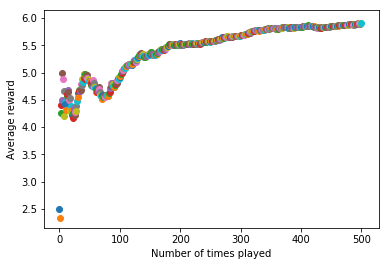

In [6]:
plt.figure()
plt.xlabel("Number of times played")
plt.ylabel("Average reward")
for i in range(500):
    if i == 100:
        eps_early = 0
    if random.random() < max(eps, eps_early): # Explore
        choice = np.where(arms == np.random.choice(arms))[0][0]
        # Or choice = arms[np.random.choice(len(arms))][0][0]?
    else: # Exploit (e-greedy)
        choice = best_arm(av)
    
    current_av = np.array([[ choice, reward(arms[choice]) ]])
    av = np.concatenate((av, current_av), axis=0)
    
    # Calculate the mean reward
    current_mean = np.mean(av[:, 1])
    plt.scatter(i, current_mean)

In [7]:
print(av)
print(len(av))
print(av[:, 0])

[[5 0]
 [7 5]
 [0 2]
 ...
 [5 3]
 [5 7]
 [5 7]]
501
[5 7 0 1 5 4 6 2 9 9 5 9 9 1 2 5 7 0 5 0 5 0 4 4 9 3 2 4 6 9 3 3 2 1 5 7 4
 3 5 1 7 3 1 5 9 5 7 0 9 6 0 5 5 2 5 8 5 6 8 0 5 2 0 5 7 7 6 0 0 8 5 5 9 6
 4 5 5 2 5 8 8 5 5 1 6 3 4 1 8 0 2 2 4 1 6 3 4 3 1 4 2 5 5 5 5 3 5 5 5 5 4
 5 5 5 9 4 5 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5 5 6 6 5 5 9 5 5 2 9 5 5 3 5 5 5
 5 5 0 5 5 5 8 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 8 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 5 7 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 8
 5 5 5 5 5 5 5 5 5 5 5 6 5 5 8 5 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 4 5 5 5 0 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5
 5 5 5 5 5 5 5 5 2 5 5 5 5 1 5 5 5 1 5 5 5 5 5 5 5 5 5 7 5 5 5 5 5 5 5 5 5
 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 7 5 5 5 5 5 5 2 5 5 5 5 5 5 6 5 5 5 5 5
 3 5 6 5 5 5 8 5 5 5 0 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 9 5 0 8 7 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9